In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix,roc_curve,auc
from sklearn import preprocessing
from warnings import filterwarnings
import os
import cv2

# IGNORING UNNECESSARRY WARNINGS

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# Import and Shuffle the dataset

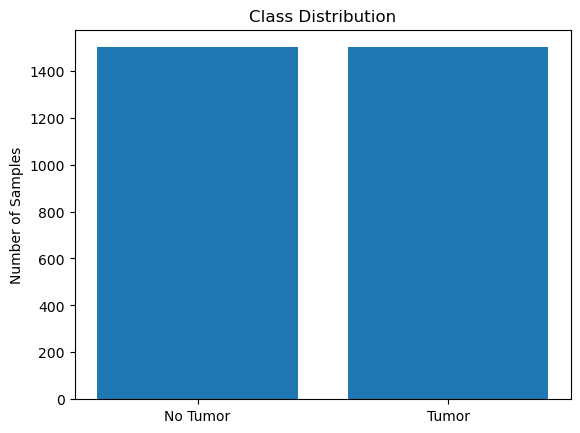

In [10]:
import os
import cv2
import random
import matplotlib.pyplot as plt

# Define the path to the dataset and class labels
path = r"E:\brain tumor\archive"# Use raw string to avoid escape characters
classes = {'no': 0, 'yes': 1}

# Initialize dataset lists
data_x = []
data_y = []

# Initialize test dataset lists for visualization purposes
test_x = []
test_y = []

# Initialize the combined data list
data = []

# Read and process images
for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img_path = os.path.join(pth, j)
        img = cv2.imread(img_path, 0)
        if img is not None:
            img = cv2.resize(img, (200, 200))
            data.append((img, classes[cls]))
    
# Shuffle the data
random.shuffle(data)

# Define the class names
class_names = ['No Tumor', 'Tumor']

# Count the number of samples in each class
class_counts = {cls: 0 for cls in classes.values()}
for _, cls in data:
    class_counts[cls] += 1

# Plot the bar chart
plt.bar(class_names, class_counts.values())
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()


In [11]:
# Split the data into train and test sets
images, labels = zip(*data)
data_images, test_images, data_labels, test_labels = train_test_split(images, labels, test_size=0.01, random_state=42)

# Append the shuffled data,test to the main lists
data_x.extend(data_images)
data_y.extend(data_labels)

test_x.extend(test_images)
test_y.extend(test_labels)
print(test_y)
    

print('Data set size : ',len(data_x))
print('Test set size : ',len(test_x))

[1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0]
Data set size :  2970
Test set size :  30


# Prepare data

In [12]:
data_x = np.array(data_x)
data_y = np.array(data_y)

data_x_updated = data_x.reshape(len(data_x), -1)
data_x_updated.shape

xtrain, xtest, ytrain, ytest = train_test_split(data_x_updated, data_y, random_state=10,
                                               test_size=.20)
xtrain.shape, xtest.shape

((2376, 40000), (594, 40000))

# Feature Scaling

In [14]:
# AS we can see, x_train & x_test are not scale
print(xtrain)
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

# Scaling the dataset
scaler = preprocessing.MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
print(xtrain)

[[0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.04705882 0.04705882 0.04705882 ... 0.03529412 0.03921569 0.04705882]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]]
1.0 0.0
1.0000000000000002 0.0
1.0 0.0
1.0 0.0
[[0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.04705882 0.04705882 0.04705882 ... 0.03529412 0.03921569 0.04705882]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]]


# Drawing metrics function

In [17]:
  def plot_metrics(ytest,pred):
    
    # Compute confusion matrix
    cm = confusion_matrix(ytest, pred)

    # Compute classification report
    report = classification_report(ytest, pred)
    #  report
    print('\n',report,'\n','_'*230,'\n\n')


    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(ytest, pred)
    roc_auc = auc(fpr, tpr)

    # Plot confusion matrix, classification report, and ROC curve
    plt.figure(figsize=(15, 5))

    # Plot confusion matrix
    plt.subplot(1, 2, 2)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix", {'fontsize': 20},y=1.3)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

    # Plot ROC curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)', {'fontsize': 20},y=1.3)
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

# Logisitic Regression 

# Training

In [19]:
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

# Training the dataset
lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


# Prediction
pred = lg.predict(xtest)

# Confusion matrix , Classification Report , ROC Curves


               precision    recall  f1-score   support

           0       0.95      0.98      0.97       320
           1       0.98      0.95      0.96       274

    accuracy                           0.96       594
   macro avg       0.97      0.96      0.96       594
weighted avg       0.96      0.96      0.96       594
 
 ______________________________________________________________________________________________________________________________________________________________________________________________________________________________________ 




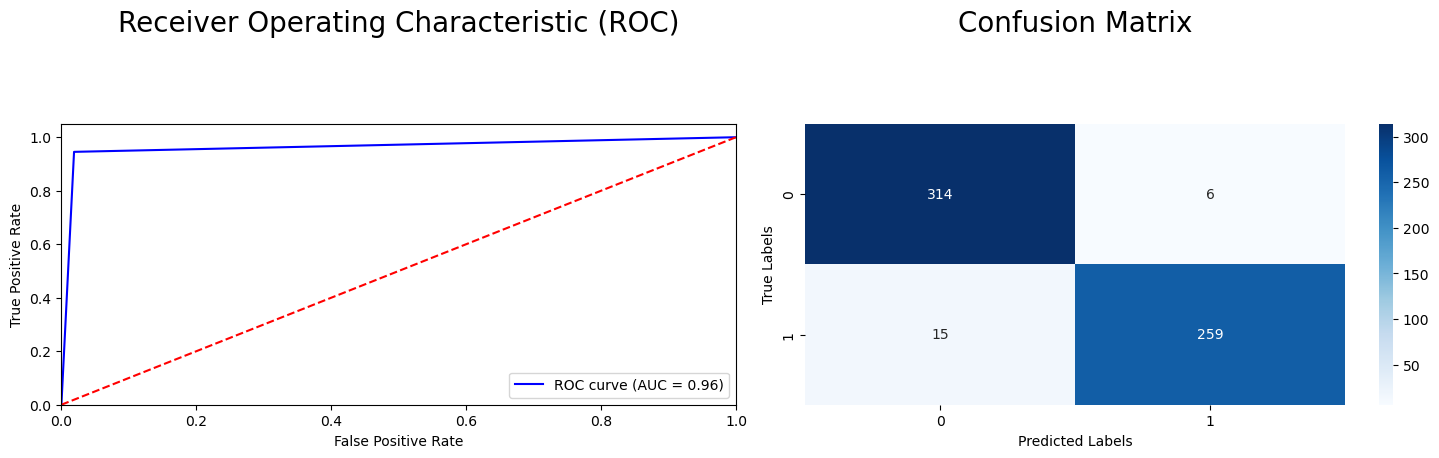

In [20]:
plot_metrics(ytest,pred)

# Visualize the proccess

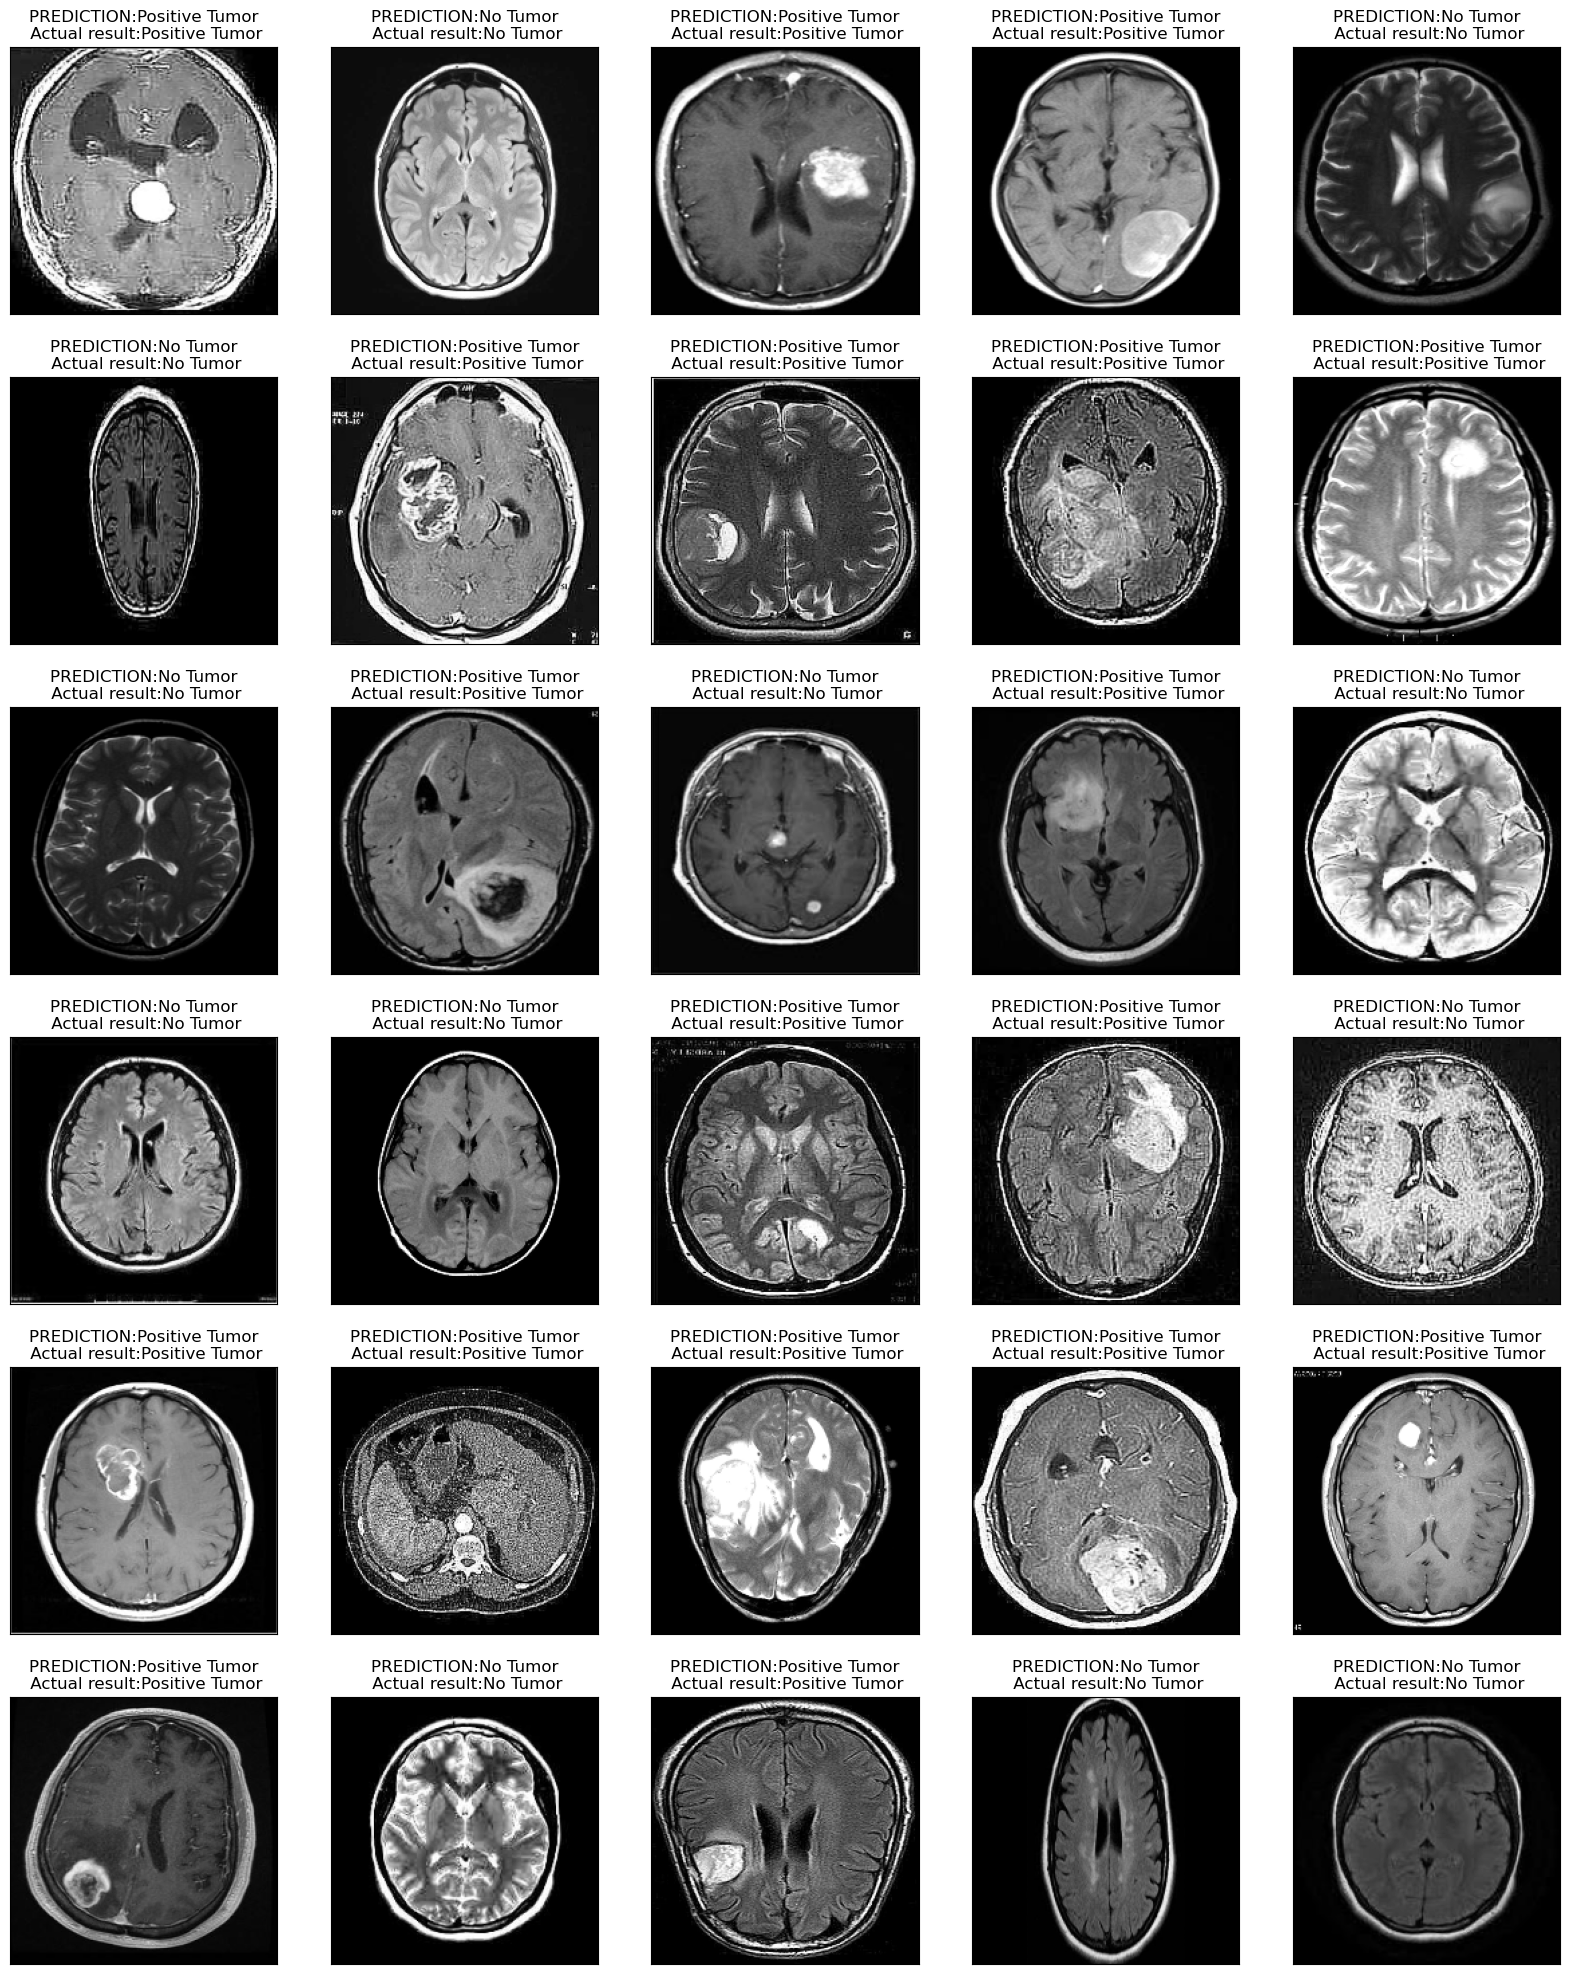

In [21]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

fig, axes = plt.subplots(nrows=6,
                         ncols=5,
                         figsize=(20, 25),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):   
       img1 = test_x[i].reshape(1,-1)/255
       p = lg.predict(img1)
       ax.imshow(test_x[i],cmap='gray')
       ax.set_title(f"PREDICTION:{dec[p[0]]}\n Actual result:{dec[test_y[i]]}")


# SVC Model

# Training and getting report

In [23]:
from sklearn.svm import SVC

# Training the dataset
sv = SVC()
sv.fit(xtrain, ytrain)

# Evaluation
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

# Prediction
pred = sv.predict(xtest)

Training Score: 1.0
Testing Score: 1.0


# Confusion matrix , Classification Report , ROC Curves


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00       327

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360
 
 ______________________________________________________________________________________________________________________________________________________________________________________________________________________________________ 




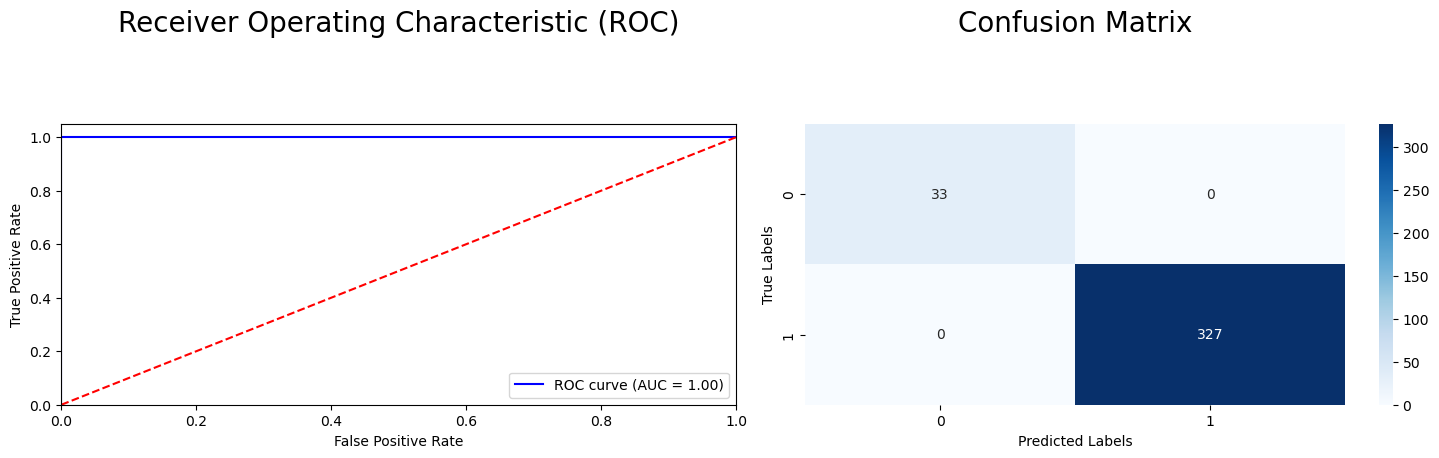

In [24]:
plot_metrics(ytest,pred)

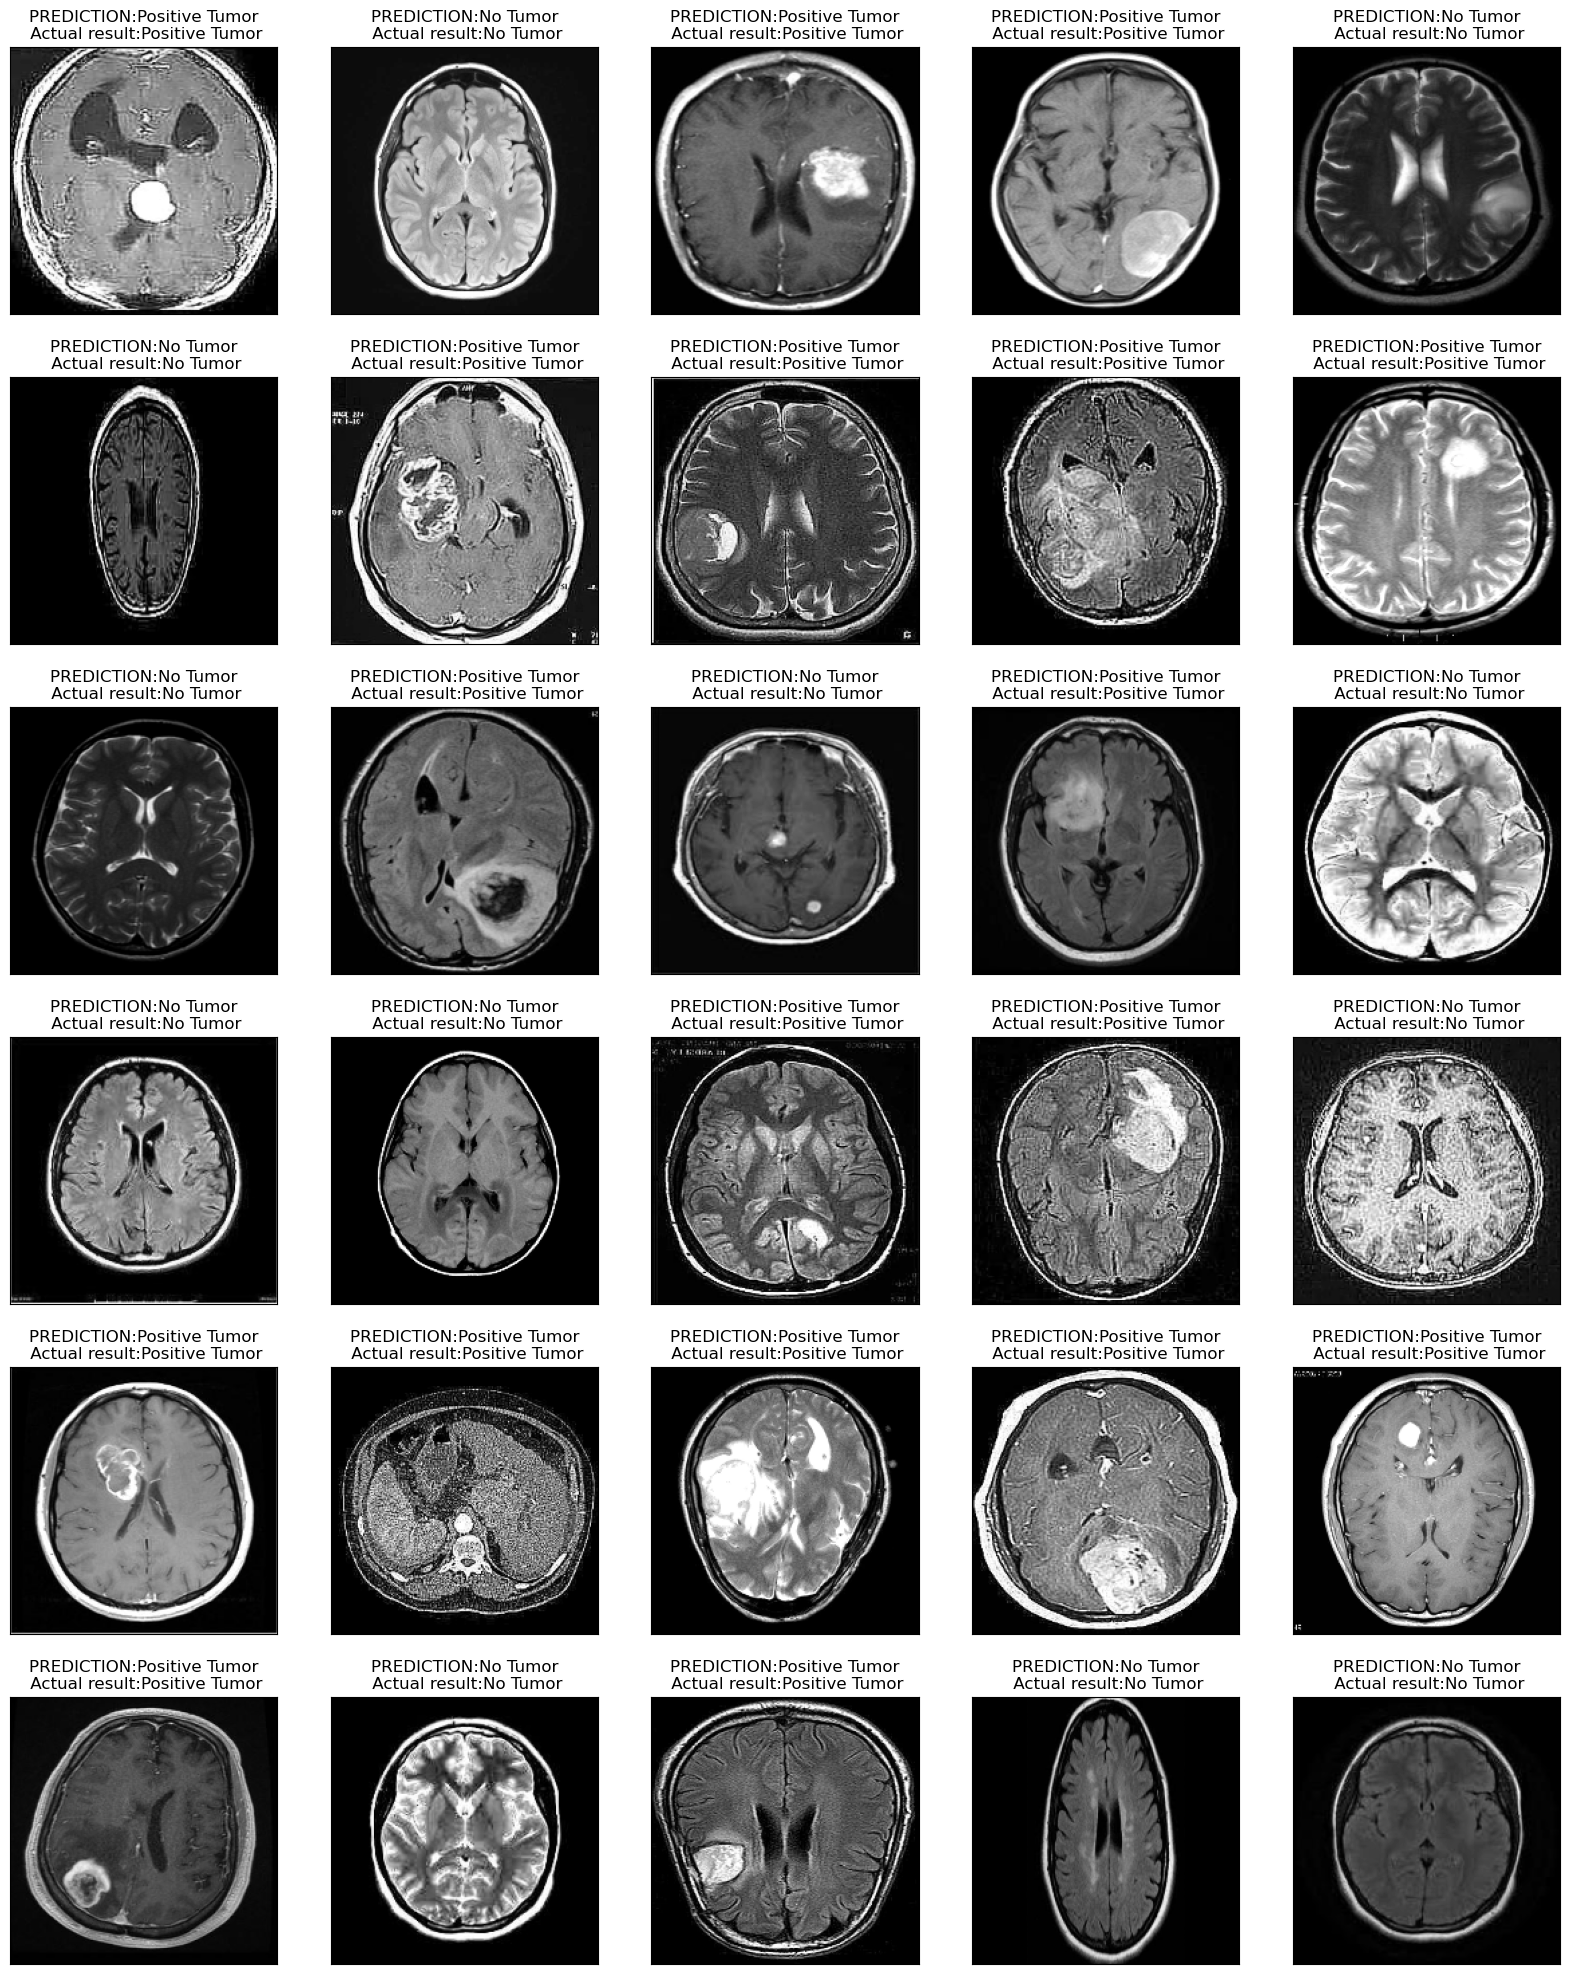

In [34]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

fig, axes = plt.subplots(nrows=6,
                         ncols=5,
                         figsize=(20, 25),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):   
       img1 = test_x[i].reshape(1,-1)/255
       p = lg.predict(img1)
       ax.imshow(test_x[i],cmap='gray')
       ax.set_title(f"PREDICTION:{dec[p[0]]}\n Actual result:{dec[test_y[i]]}")

# kNN

# Training

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# train the dataset
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(xtrain, ytrain)

# Prediction
pred = knn_model.predict(xtest)

# Confusion matrix , Classification Report , ROC Curves


               precision    recall  f1-score   support

           0       0.99      0.98      0.98       183
           1       0.98      0.99      0.98       177

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360
 
 ______________________________________________________________________________________________________________________________________________________________________________________________________________________________________ 




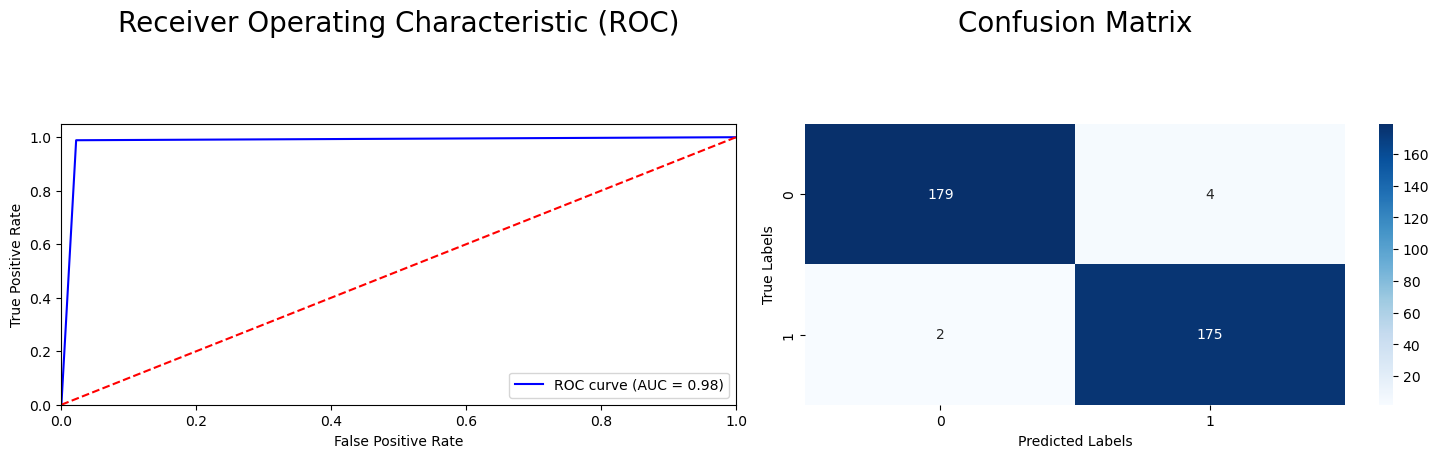

In [41]:
plot_metrics(ytest, pred)

# Visualize the proccess 

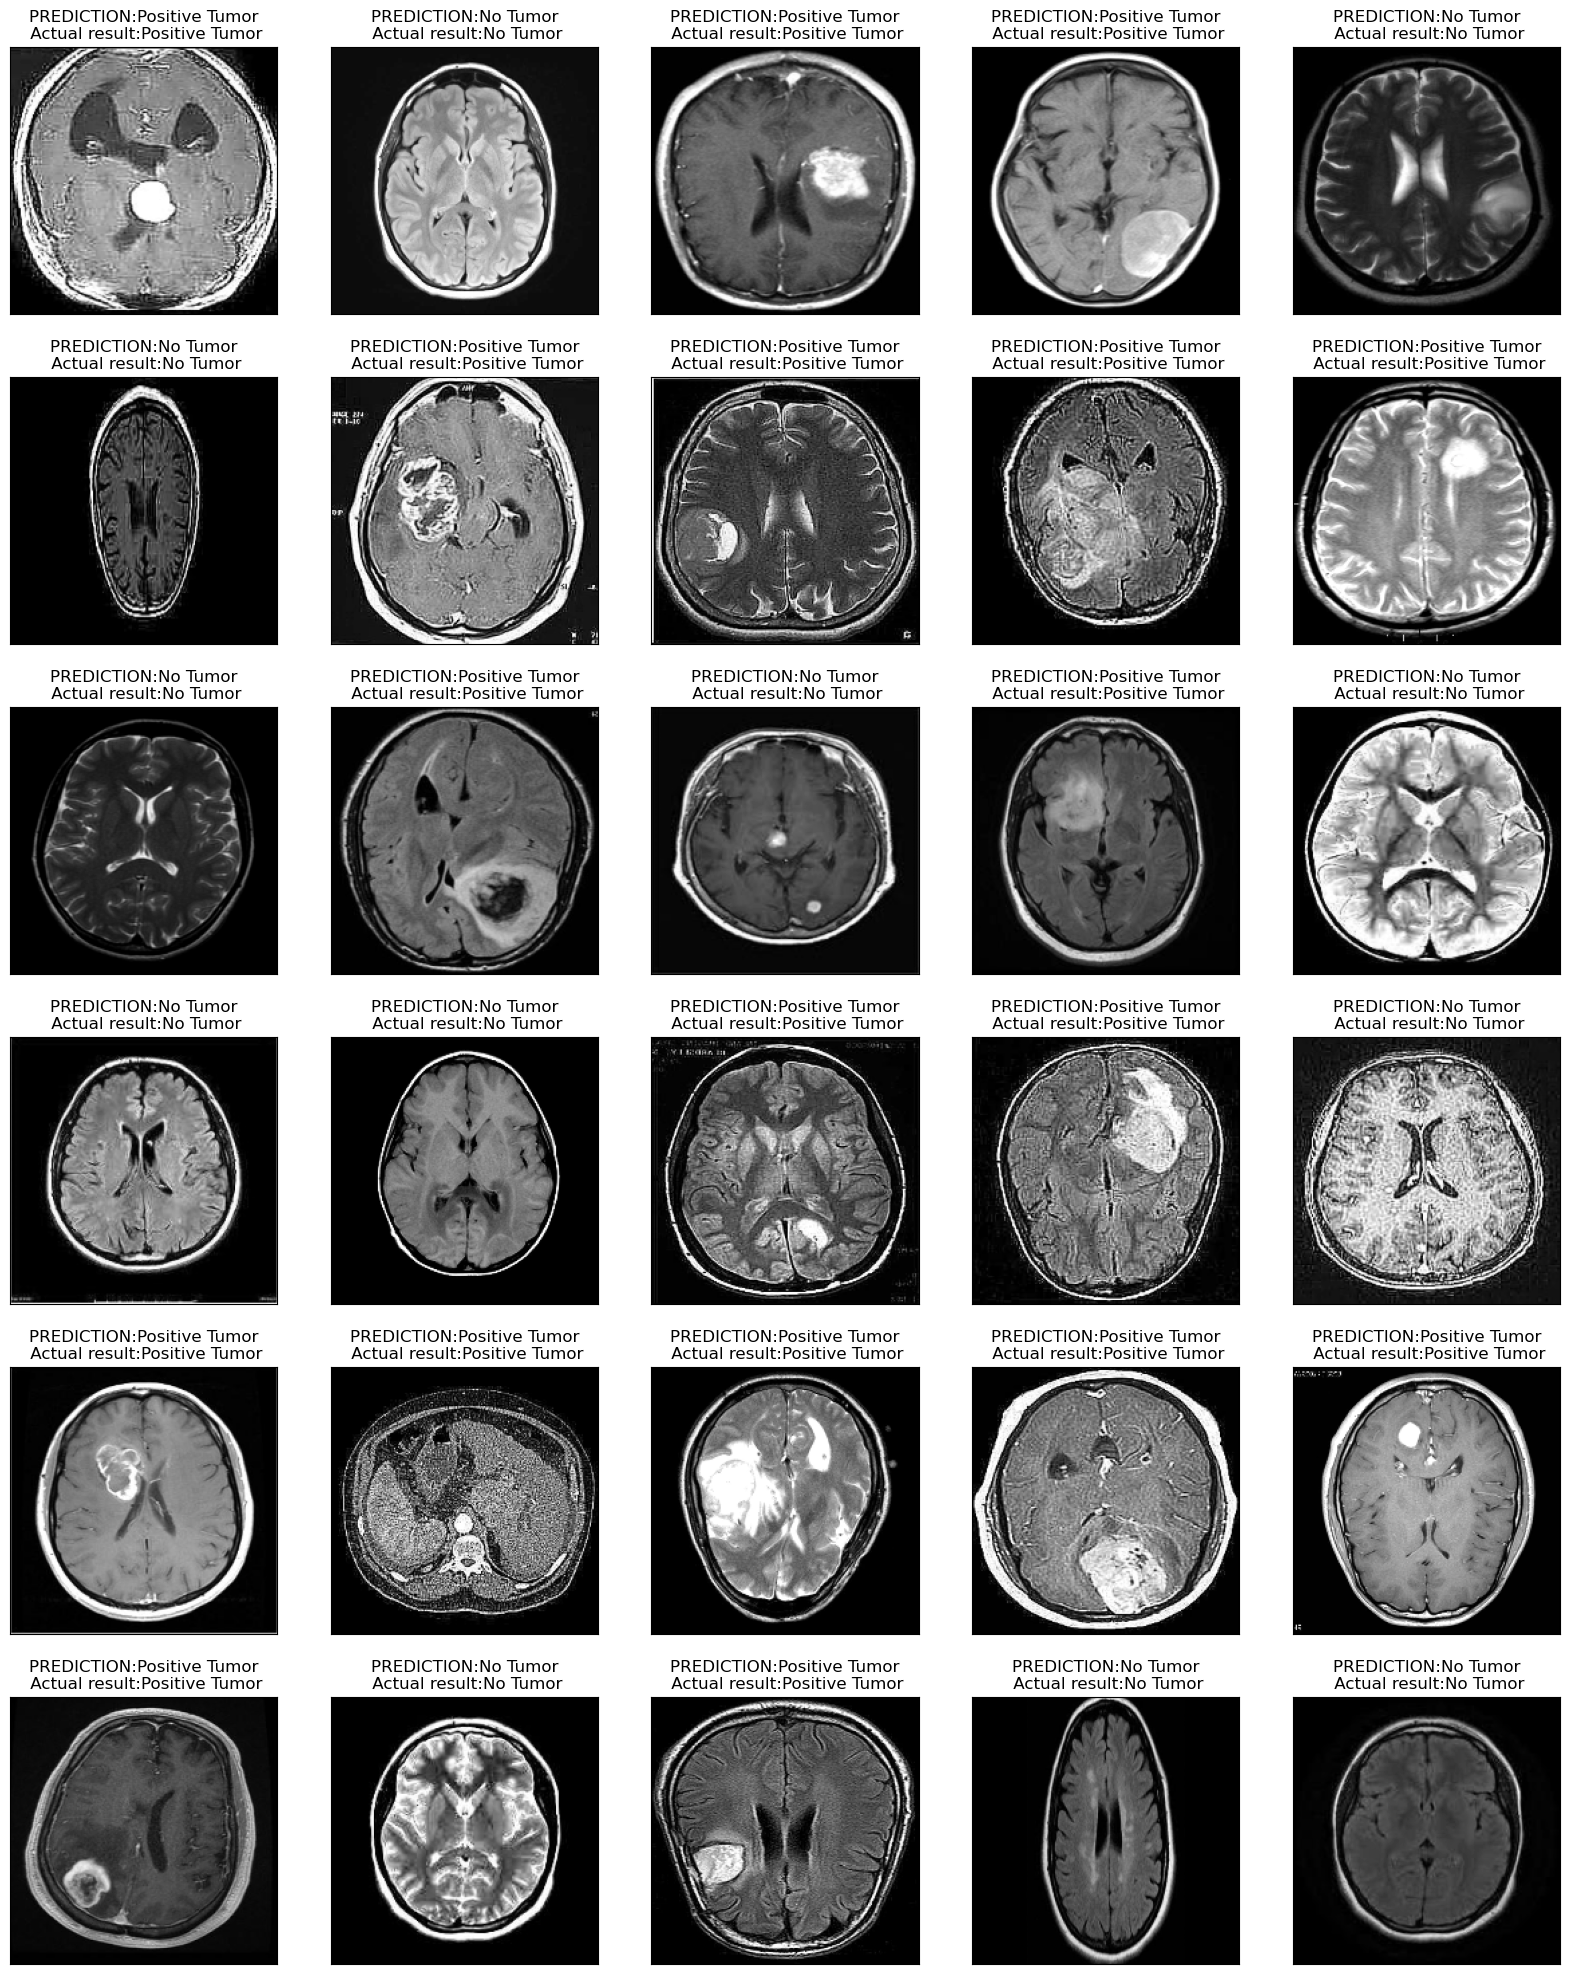

In [43]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

fig, axes = plt.subplots(nrows=6,
                         ncols=5,
                         figsize=(20, 25),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):   
       img1 = test_x[i].reshape(1,-1)/255
       p = lg.predict(img1)
       ax.imshow(test_x[i],cmap='gray')
       ax.set_title(f"PREDICTION:{dec[p[0]]}\n Actual result:{dec[test_y[i]]}")

# Naive Bayes

# Training and getting report


In [22]:
from sklearn.naive_bayes import GaussianNB

# Confusion matrix , Classification Report , ROC Curves

In [25]:
from sklearn.naive_bayes import GaussianNB


In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits  # Example dataset

# Load dataset (example using Digits dataset)
data = load_digits()
X, y = data.images, data.target

# We only use two classes for the example (0 and 1)
X = X[y < 2]
y = y[y < 2]

# Split dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

# Flatten images for Naive Bayes
xtrain_flat = xtrain.reshape(xtrain.shape[0], -1)
xtest_flat = xtest.reshape(xtest.shape[0], -1)

# Train the model
nb_model = GaussianNB()
nb_model.fit(xtrain_flat, ytrain)

# Prediction
pred = nb_model.predict(xtest_flat)

print(pred)


[1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1
 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0
 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0]


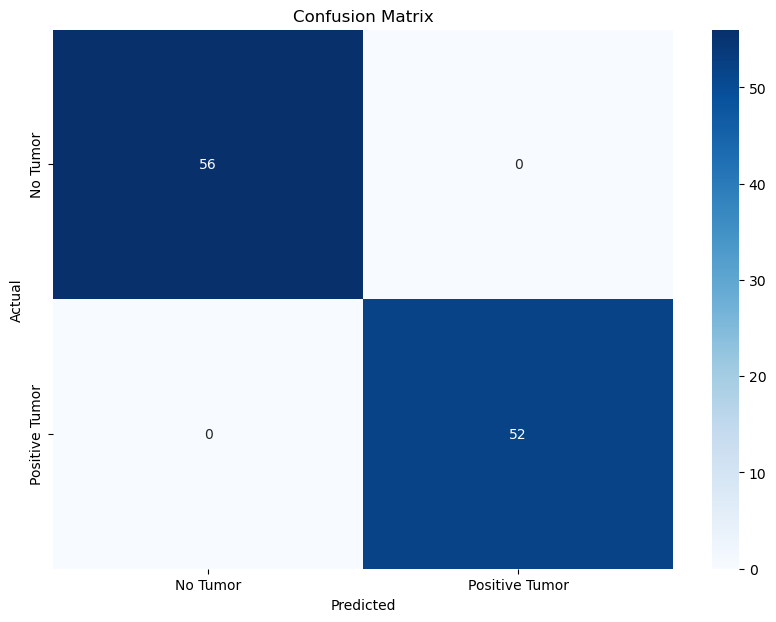

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def plot_metrics(y_true, y_pred):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tumor', 'Positive Tumor'], yticklabels=['No Tumor', 'Positive Tumor'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Print metrics
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')

# Usage
plot_metrics(ytest, pred)


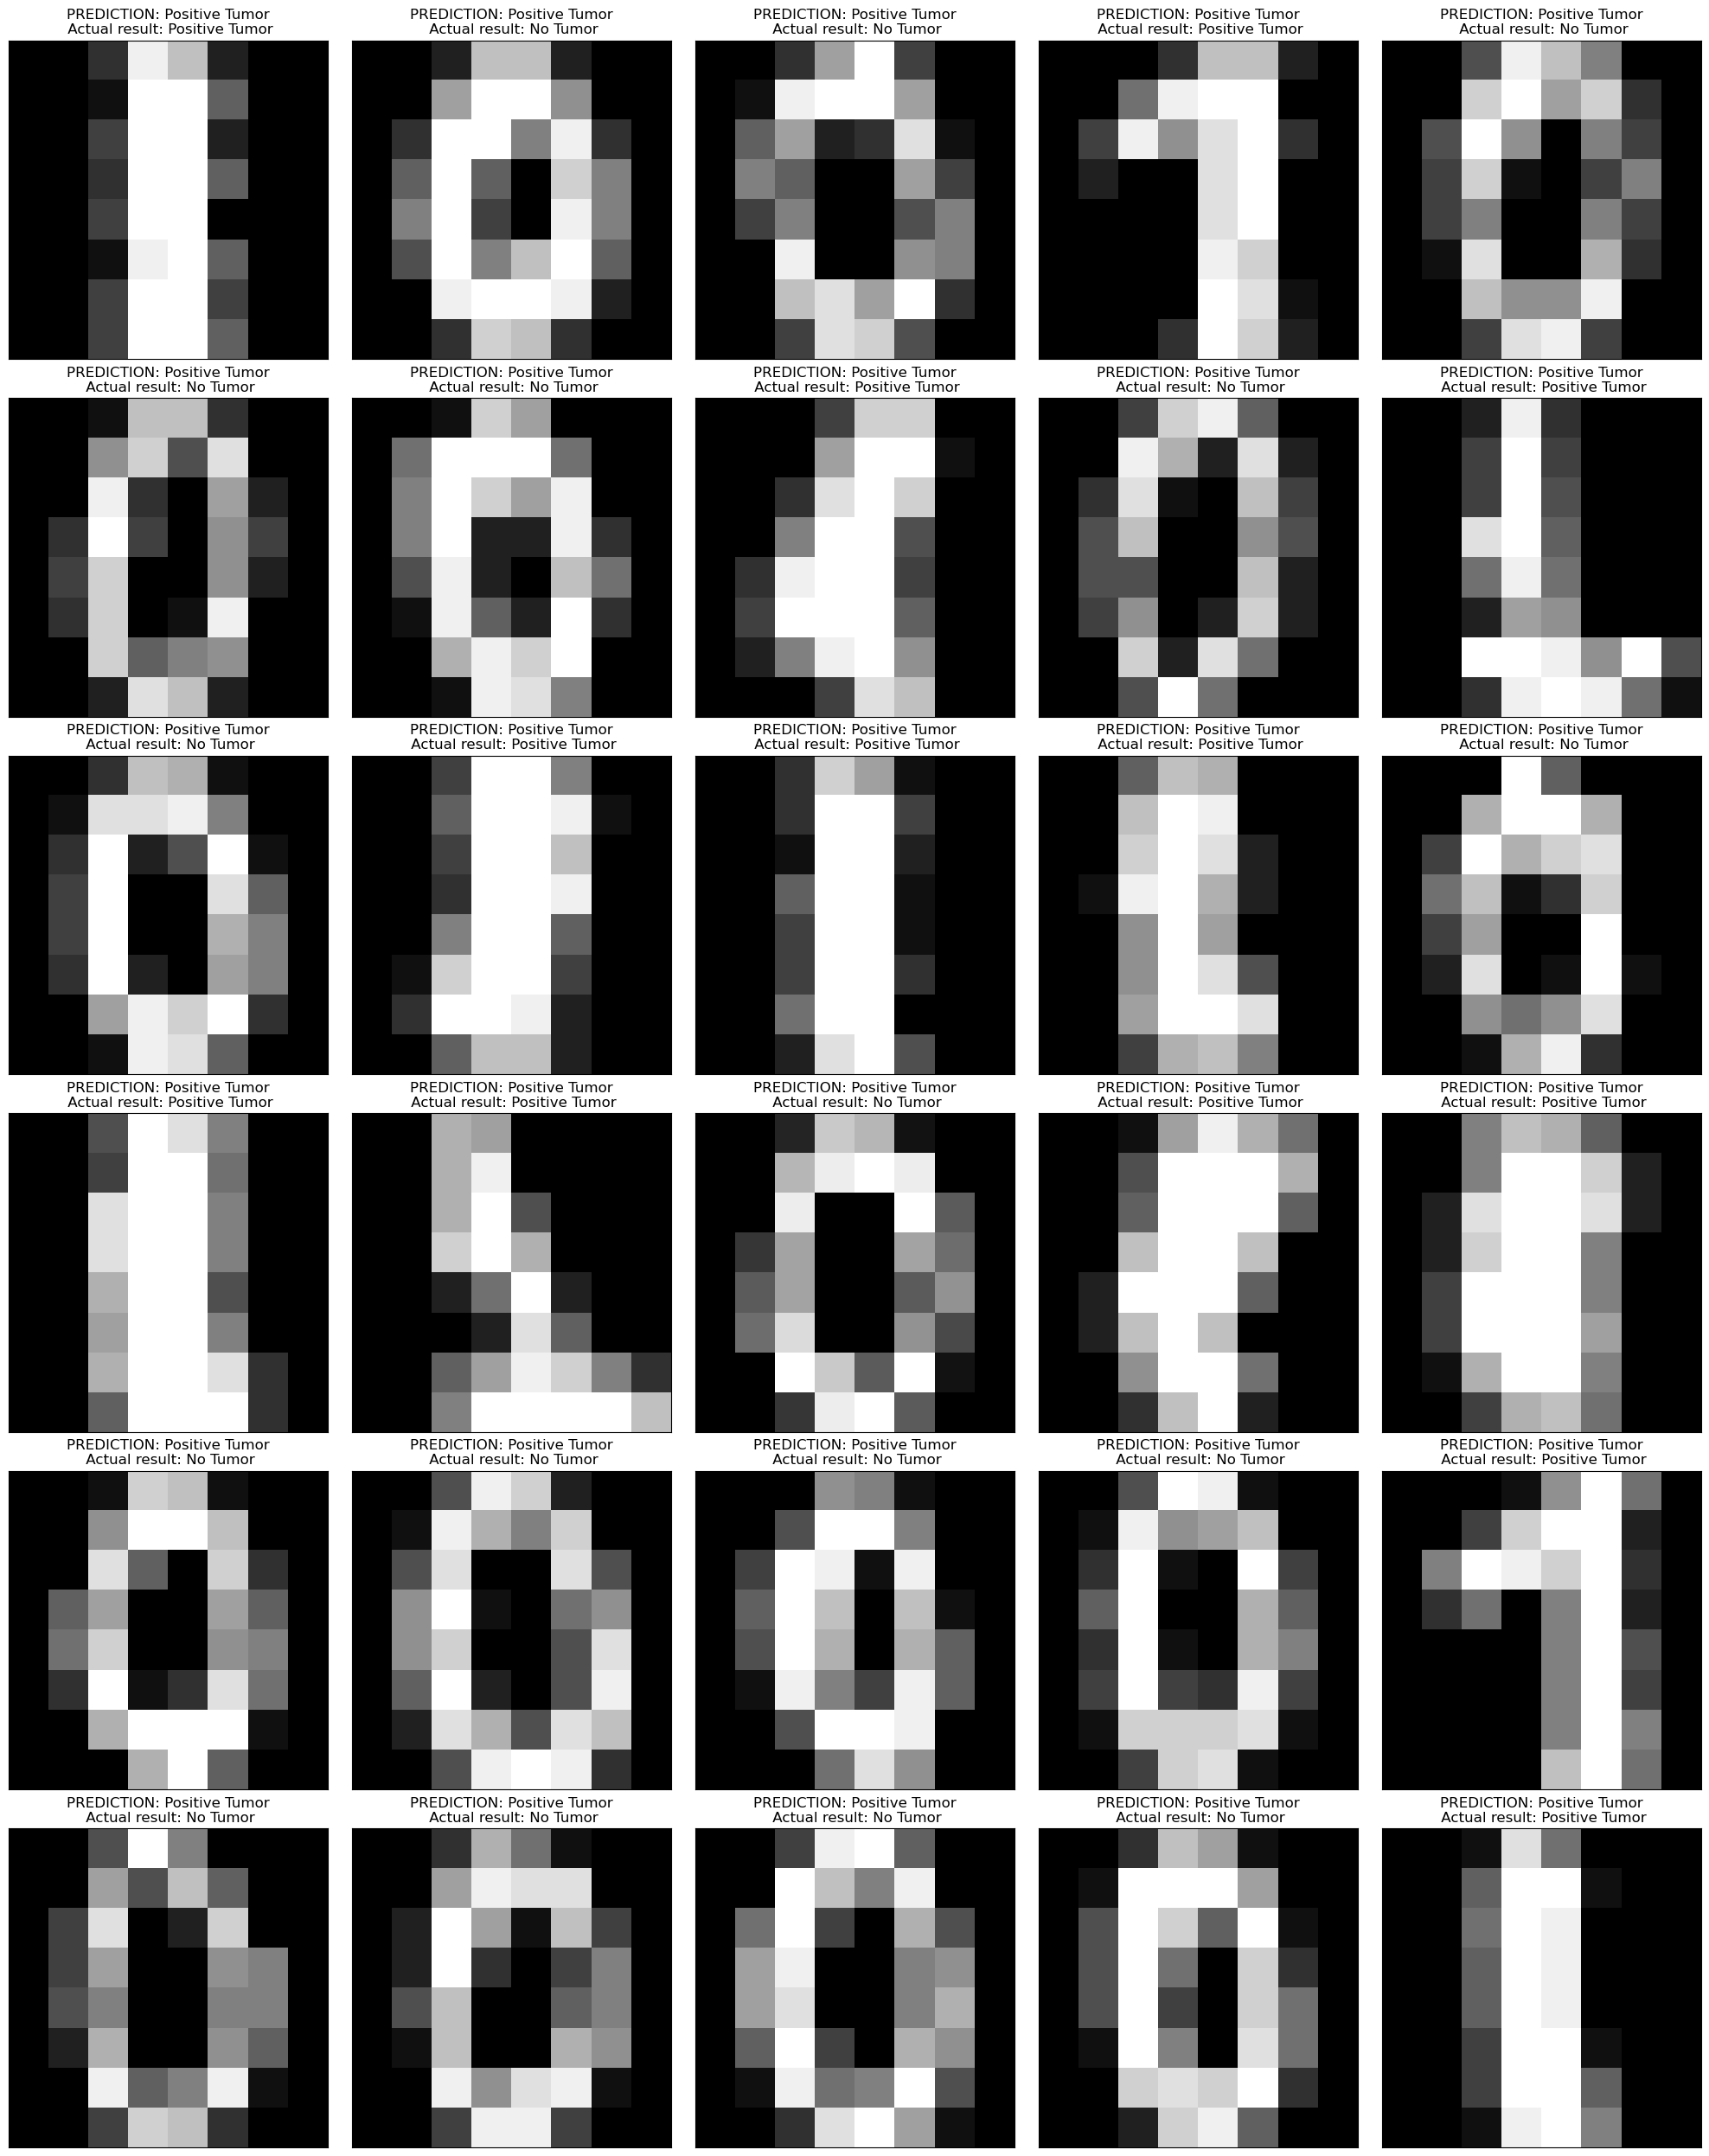

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits  # Example dataset

# Load dataset (example using Digits dataset)
data = load_digits()
X, y = data.images, data.target

# We only use two classes for the example (0 and 1)
X = X[y < 2]
y = y[y < 2]

# Split dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

# Flatten images for Naive Bayes (if necessary)
xtrain_flat = xtrain.reshape(xtrain.shape[0], -1)
xtest_flat = xtest.reshape(xtest.shape[0], -1)

# Train the model
nb_model = GaussianNB()
nb_model.fit(xtrain_flat, ytrain)

# Prediction
pred = nb_model.predict(xtest_flat)

# Define the mapping
dec = {0: 'No Tumor', 1: 'Positive Tumor'}

# Plot the images with predictions
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 25), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    if i < len(xtest):
        img1 = xtest_flat[i].reshape(1, -1) / 255
        p = nb_model.predict(img1)
        ax.imshow(xtest[i], cmap='gray')
        ax.set_title(f"PREDICTION: {dec[p[0]]}\n Actual result: {dec[ytest[i]]}")

plt.tight_layout()
plt.show()


In [41]:
def plot_history(history):
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))  # Create a figure with 1 row and 3 columns

    # Plot the first graph on the first axis (axs[0])
    axs[0].plot(history.history['loss'], label='loss')
    axs[0].plot(history.history['val_loss'], label='val_loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Binary crossentropy')
    axs[0].grid(True)

    # Plot the second graph on the second axis (axs[1])
    axs[1].plot(history.history['accuracy'], label='accuracy')
    axs[1].plot(history.history['val_accuracy'], label='val_accuracy')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].grid(True)

    # Plot the third graph on the third axis (axs[2])
    summary = pd.DataFrame(history.history)
    summary.plot(ax=axs[2])

    plt.tight_layout()  # Adjust the spacing between subplots


In [46]:
pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.


In [47]:
import tensorflow as tf

def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(None,40000)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

In [48]:
least_val_loss = float('inf')
least_loss_model = None
epochs=10
dropout_prob = 0
for num_nodes in [32, 64]:
    for lr in [0.01, 0.001]:
      for batch_size in [32, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(xtrain, ytrain, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
       
        results = model.evaluate(xtest, ytest,verbose=0)
        print("LOSS:  " + "%.4f" % results[0])
        print("ACCURACY:  " + "%.2f" % results[1])
        val_loss = results[0]
        print("_"*230,'\n\n\n')
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

32 nodes, dropout 0, lr 0.01, batch size 32


ImportError: Keras cannot be imported. Check that it is installed.